In [1]:
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display # to display images
from pprint import pprint
import json, random, os
import numpy as np


INPUT_FILENAME_ZH_CN = 'chars_simpl.json'
INPUT_FILENAME_ZH_TW = 'chars_trad.json'


def read_yaml_sounds(filename, offset):
    # return dictionary of sounds
    sounds = {}
    with open(filename) as f:
    # remove header
        for i in range(offset):
            next(f)
        for line in f:
            line_split = line.split()
            if (len(line_split) == 2):
                key, val = line.split()[:2]
                sounds[key] = val
            if (len(line_split) == 3 and 
                len(line_split[0]) == 1 and float(line_split[-1][:-1])>= 50):
                # third column indicates percentages for characters with 
                # multiple pronunciations 
                key, val = line.split()[:2]
                sounds[key] = val
    return sounds

# middle (Tang Dynasty reconstruction) Chinese  
sounds_mc = read_yaml_sounds("sounds/zyenpheng.dict.yaml", 18)
# Standard (Peking) Mandarin pronunciations
sounds_pk = read_yaml_sounds("sounds/terra_pinyin.dict.yaml", 33)
sounds_pk_simp = read_yaml_sounds("sounds/luna_pinyin.dict.yaml", 36) 
# Shanghai Wu pronunciations (no tones)
sounds_sh = read_yaml_sounds("sounds/wugniu_lopha.dict.yaml", 21)
# Guangzhou Cantonese pronunciations (no tones)
sounds_gz = read_yaml_sounds("sounds/jyutping.dict.yaml", 18)

dict_sounds = {
    "mc" : sounds_mc,
    "pk" : sounds_pk,
    "sh" : sounds_sh,
    "gz" : sounds_gz,
    "pk_s" : sounds_pk_simp
}

string = "故其戰勝不忒不忒者其所措必勝勝已敗者也"
for char in string:
    print(char, dict_sounds["mc"][char])


def get4(thechars):
    return random.sample(thechars,4)

def get4seal(thechars):
    indices = np.random.randint(0,255,4)
    # mychars = [thechars]
    myseal = u"%s%s\n%s%s" % (thechars[indices[0]], 
                              thechars[indices[1]+256], 
                              thechars[indices[2]+256], 
                              thechars[indices[3]+256])
    return myseal
    
def make_seal_im(mychars, fontpath='./fonts/SimSun.ttf', 
                 imsize=(256,256), fontsize=128, 
                 offsets=(0,0)):

    ttf = ImageFont.truetype(fontpath, fontsize)
    im = Image.new("RGB", imsize, "black")
    draw = ImageDraw.Draw(im)
    
    assert len(mychars) == 4
    char1, char2, char3, char4 = mychars
    deltax, deltay = offsets
    
    # now figure out the locations based equal spacing of mysize
    col1, row1 = 0 + deltax, 0 + deltay
    col2, row2 = (imsize[0] // 2) + deltax, (imsize[1] // 2) + deltay
    
    #ImageDraw.Draw(im).text( (col1,row1), char1, fill='red', font=ttf)
    #ImageDraw.Draw(im).text( (col2,row1), char2, fill='green', font=ttf)    
    #ImageDraw.Draw(im).text( (col1,row2), char3, fill='blue', font=ttf)
    #ImageDraw.Draw(im).text( (col2,row2), char4, fill='white', font=ttf)

    # right to left, top to bottom
    draw.text( (col1,row1), char1, fill='white', font=ttf)
    draw.text( (col2,row1), char2, fill='white', font=ttf)    
    draw.text( (col1,row2), char3, fill='white', font=ttf)
    draw.text( (col2,row2), char4, fill='white', font=ttf)
    
    return im



def seal_to_string(seal): 
    new = "" 
    for x in seal: 
        new += x  
    return new 

def save_seal_to_text(ofilename, seal):
    otxtfileobj = open(ofilename,"w")
    otxtfileobj.write(seal_to_string(seal))
    otxtfileobj.close()


def save_random_seals_to_dir(fontpath, output_directory, 
                             numseals, chinese_chars, sound, offsets):
    assert os.path.isfile(fontpath), "%s was not a file!" % fontpath

    if not os.path.isdir( output_directory):
        print("Creating %s..." % output_directory)
        os.makedirs(output_directory)

    for i in range(numseals):
        myseal = get4(chinese_chars)
        # save characters and identify broken ones for the font
        sounds = dict_sounds[sound]
        char_sounds = sounds[myseal[0]] + sounds[myseal[1]] + \
                      sounds[myseal[2]] + sounds[myseal[3]] 
        otxtfilename = "%s/%s.txt" % (output_directory, char_sounds)
        save_seal_to_text(otxtfilename, myseal)
        im = make_seal_im(myseal, fontpath=fontpath, offsets=offsets)
        ofilename = "%s/%s.png" % (output_directory, char_sounds)
        im.save( ofilename, format='PNG')
        #print("Saved to %s..." % ofilename)

    #print("Saved", numseals, "images to", output_directory)
    


with open('chars_trad.json') as f:
    chinese_chars_trad = json.load(f)
    
with open('chars_simpl.json') as f:
    chinese_chars_simpl = json.load(f)

故 koh
其 ki
戰 cjenh
勝 sjingh
不 pyot
忒 thok
不 pyot
忒 thok
者 cjax
其 ki
所 sriox
措 choh
必 pjit
勝 sjingh
勝 sjingh
已 zsix
敗 prad
者 cjax
也 jax


In [2]:
print("Printing 5 random seals...")
for i in range(5):
    print( get4seal(chinese_chars_trad), '\n' )

Printing 5 random seals...
此準
備類 

主強
綫飛 

將司
連王 

但金
除邊 

必算
路失 



Printing 5 random seals images...


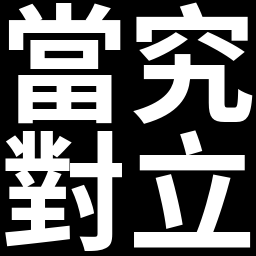

Saved to 0.png...


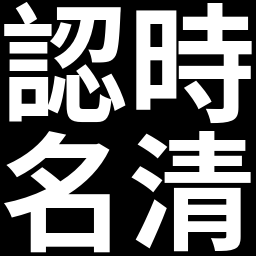

Saved to 1.png...


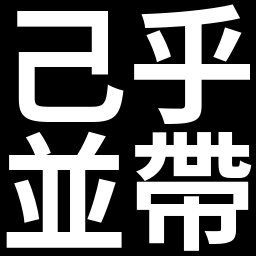

Saved to 2.png...


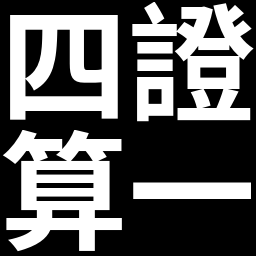

Saved to 3.png...


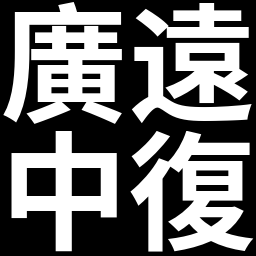

Saved to 4.png...


In [3]:
print("Printing 5 random seals images...")
for i in range(5):
    # im = make_seal_im(get4(chinese_chars_trad), fontpath='./fonts/WanYongCuLi-2.ttf' )
    im = make_seal_im(get4(chinese_chars_trad), fontpath='./fonts/NotoSansSC-Bold.otf', offsets=(0,-36))
    display(im)
    print("Saved to %s.png..." % i)

    
    im.save("%s.png" % i, format='PNG')

In [5]:
FONTS_AND_OUTPUTS_ZH_TW = [
    ('./fonts/HanaMinA.ttf', 'output/HMA', "sh", (0,0)),
    # from https://depart.moe.edu.tw/ED2400/News.aspx?n=3783ED6E5EB0B437&sms=707ED96D12B73148
    ('./fonts/eduSong_Unicode.ttf', 'output/edusong', "pk", (0,0)),
    ('./fonts/edukai-4.0.ttf', 'output/edukai', "pk", (0,0)),    # regular script
    ('./fonts/MoeLI.ttf', 'output/MoeLI', "mc", (0,-24)),          # clerical script
    #('./fonts/SimSun.ttf', 'output/SimSun'),
    #('./fonts/WanYongCuLi-2.ttf', 'output/WanYoung'),
    ('./fonts/SourceHanSansTW-Bold.otf', 'output/HansSansBold', "gz", (0,-36)),
    ('./fonts/NotoSansSC-Bold.otf', 'output/NotoSansBold', "gz", (0,-36)),
    ('./fonts/NotoSansMonoCJKtc-Regular.otf', 'output/NotoSansMono', "pk", (0,-36)),
    ('./fonts/wqy-microhei.ttc', 'output/wqy-mhei', "sh", (0,-8)),
]

FONTS_AND_OUTPUTS_ZH_CN = [
    ('./fonts/LongCang-Regular.ttf', 'output/LongCang', "pk_s", (0,0)),
    ('./fonts/ZCOOLKuaiLe-Regular.ttf', 'output/KuaiLe', "pk_s", (0,0)),
    ('./fonts/ZCOOLQingKeHuangYou-Regular.ttf', 'output/KeHuangYou', "pk_s", (0,0)),
    ('./fonts/ZCOOLXiaoWei-Regular.ttf', 'output/XiaoWei', "pk_s", (0,0)),
    ('./fonts/本墨钧宋.ttf', 'output/本墨钧宋/', "pk_s", (0,0)),
]


numseals = 100

for fontfile, outputdir, sound, offset in FONTS_AND_OUTPUTS_ZH_TW:
    save_random_seals_to_dir(fontfile, outputdir, numseals, chinese_chars_trad, sound, offset)
    print("Saved", numseals, "images to", outputdir)



for fontfile, outputdir, sound, offset in FONTS_AND_OUTPUTS_ZH_CN:
    save_random_seals_to_dir(fontfile, outputdir, numseals, chinese_chars_simpl, sound, offset)
    print("Saved", numseals, "images to", outputdir)


Saved 100 images to output/HMA
Saved 100 images to output/edusong
Saved 100 images to output/edukai
Saved 100 images to output/MoeLI
Saved 100 images to output/HansSansBold
Saved 100 images to output/NotoSansBold
Saved 100 images to output/NotoSansMono
Saved 100 images to output/wqy-mhei
Saved 100 images to output/LongCang
Saved 100 images to output/KuaiLe
Saved 100 images to output/KeHuangYou
Saved 100 images to output/XiaoWei
Saved 100 images to output/本墨钧宋/
